## Importing Libraries

In [2]:
import cv2
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets,transforms,models
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from PIL import Image
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

## Convolutional Neural Network

In [3]:
class ConvolutionalNetwork(nn.Module):
    
    def __init__(self):
        super().__init__()
        
        self.conv1 = nn.Conv2d(3,6,3,1)
        self.conv2 = nn.Conv2d(6,16,3,1)
        self.fc1 = nn.Linear(54*54*16,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,2)
        
    def forward(self,X):
        
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X,2,2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X,2,2)
        X = X.view(-1,54*54*16)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        
        return F.log_softmax(X,dim=1)

## Image Data Preprocessing

In [4]:
test_transform = transforms.Compose([
   transforms.Resize(224),
   transforms.CenterCrop(224),
   transforms.ToTensor(),
   transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
])

## Face Detection Algorithm

In [5]:

def ask_for_tracker():
    print("Welcome! What Tracker API would you like to use?")
    print("Enter 0 for BOOSTING: ")
    print("Enter 1 for MIL: ")
    print("Enter 2 for KCF: ")
    print("Enter 3 for TLD: ")
    print("Enter 4 for MEDIANFLOW: ")
    choice = input("Please select your tracker: ")
    
    if choice == '0':
        tracker = cv2.TrackerBoosting_create()
    if choice == '1':
        tracker = cv2.TrackerMIL_create()
    if choice == '2':
        tracker = cv2.TrackerKCF_create()
    if choice == '3':
        tracker = cv2.TrackerTLD_create()
    if choice == '4':
        tracker = cv2.TrackerMedianFlow_create()


    return tracker

In [6]:
mask_predictor = ConvolutionalNetwork()
mask_predictor.load_state_dict(torch.load('Mask_predict.pt'))
mask_predictor.eval()

ConvolutionalNetwork(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=46656, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=2, bias=True)
)

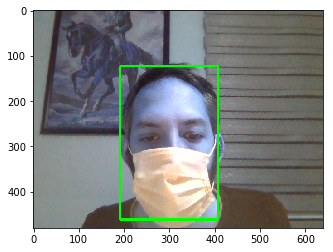

In [47]:
plt.imshow(frame)

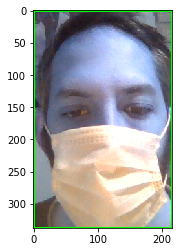

In [48]:
plt.imshow(frame[y:y+h,x:x+w])

## Probabiliy calculation method

In [128]:
sm = torch.nn.Softmax()

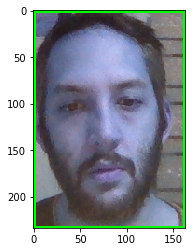

In [35]:
plt.imshow(frame[y:y+h,x:x+w])

## Mask Detection

In [165]:
def detect_face(img):
    
    global x,y,w,h,probability
    
    face_img = img.copy()
    
    face_rects = face_cascade.detectMultiScale(face_img)
    
    crop_img = frame[y:y+h,x:x+w]
    crop_img = cv2.cvtColor(crop_img, cv2.COLOR_BGR2RGB)
    crop_img = Image.fromarray(crop_img)
    crop_img = test_transform(crop_img)

    with torch.no_grad():

        new_data = mask_predictor(crop_img.view(1,3,224,224))
        
    probability = sm(new_data)
    
    for(x,y,w,h) in face_rects:
        
        if (probability[0][1].numpy() < probability[0][0].numpy()):
        
            cv2.rectangle(face_img,(x,y-40),(x+w,y+h+20),(0,255,0),10)
        elif (probability[0][1].numpy() > probability[0][0].numpy()):
            
            cv2.rectangle(face_img,(x,y-40),(x+w,y+h+20),(0,0,255),10)
            
        
    return face_img

In [156]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [166]:
cap = cv2.VideoCapture(0)

while True:
    
    ret,frame = cap.read(0)
    
    frame = detect_face(frame)
    
    cv2.imshow('Video Face Detect',frame)
    
    k=cv2.waitKey(1)
    
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()

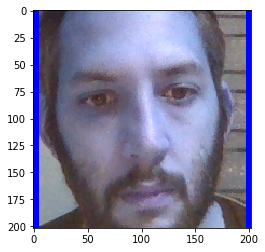

In [158]:
plt.imshow(frame[y:y+h,x:x+w])

In [159]:
probability

tensor([[0.1825, 0.8175]])

In [121]:
probability[0][1]

tensor(0.5404)

In [122]:
probability[0][1].numpy() > probability[0][0].numpy()

True

In [116]:
probability[0][0]

tensor(0.4596)

In [117]:
probability[0][1].numpy() < probability[0][0].numpy()

False

In [143]:
import matplotlib.image as mpimg

In [144]:
mpimg.imsave("test.jpg", frame[y:y+h,x:x+w])